# Lab 07

In [1]:
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt
import time

## Part 1

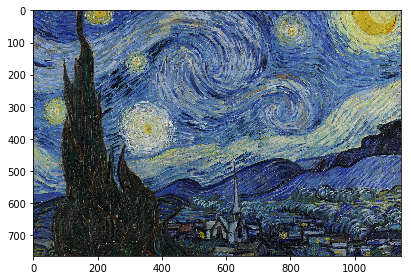

In [29]:
# Load image here. Display the image and the image shape.
import os
image = io.imread("starry.jpg")
io.imshow(image)
plt.show()

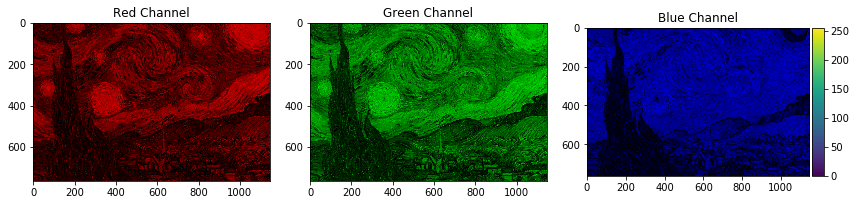

In [32]:
# Make the color arrays and display them on a labelled subplot.
plt.figure(figsize=(12,36))
plt.subplot(1,3,1)
plt.title("Red Channel")
red = np.copy(image)
red[:,:,[1,2]] = 0
io.imshow(red)

plt.subplot(1,3,2)
plt.title("Green Channel")
green = np.copy(image)
green[:,:,[0,2]] = 0
io.imshow(green)

plt.subplot(1,3,3)
plt.title("Blue Channel")
blue = np.copy(image)
blue[:,:,[0,1]] = 0
io.imshow(blue)

plt.show()


## Part 2

In [40]:
from math import sqrt
from skimage.feature import blob_log, blob_doh
from skimage.color import rgb2gray

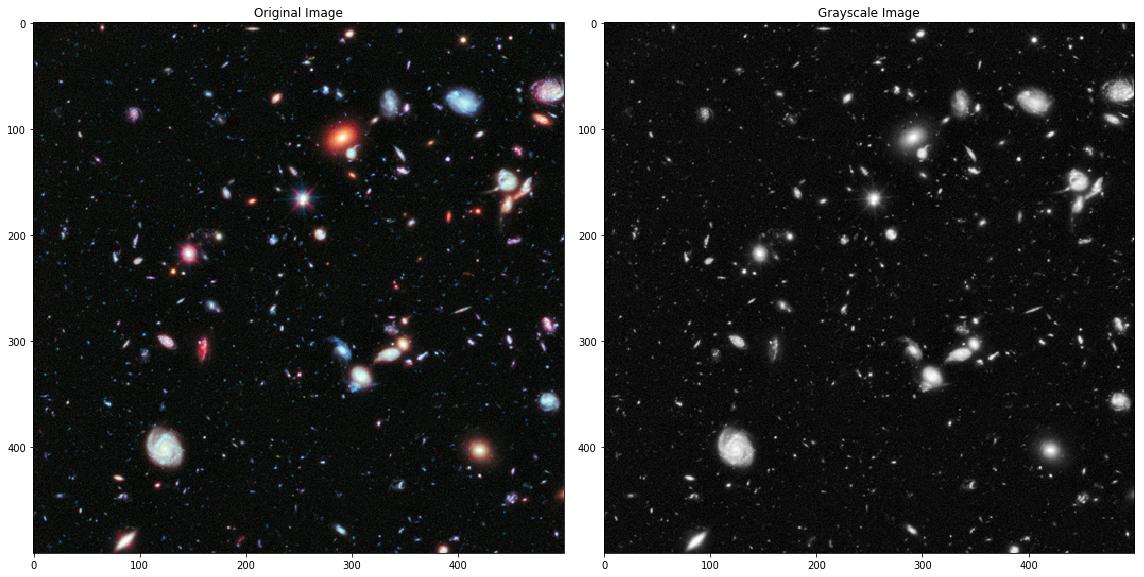

In [39]:
# Here is the image of the Hubble Deep Field. 
image = data.hubble_deep_field()[0:500, 0:500]

#Convert the image to grayscale and display next to the original.
gray_scale = rgb2gray(image)

plt.figure(figsize=(16,32))
plt.subplot(1,2,1)
plt.title("Original Image")
io.imshow(image)

plt.subplot(1,2,2)
plt.title("Grayscale Image")
io.imshow(gray_scale,cmap="gray")

plt.show()


In [78]:
# Apply the two Blob detection methods and measure the time taken by the algorithms.

# Laplacian of Gausian blob detection algorithm
%time log_blobs = blob_log(gray_scale, threshold=0.3)
%time doh_blobs = blob_doh(gray_scale, threshold=0.01)

CPU times: user 1.37 s, sys: 17.2 ms, total: 1.39 s
Wall time: 1.39 s
CPU times: user 284 ms, sys: 20.1 ms, total: 304 ms
Wall time: 303 ms


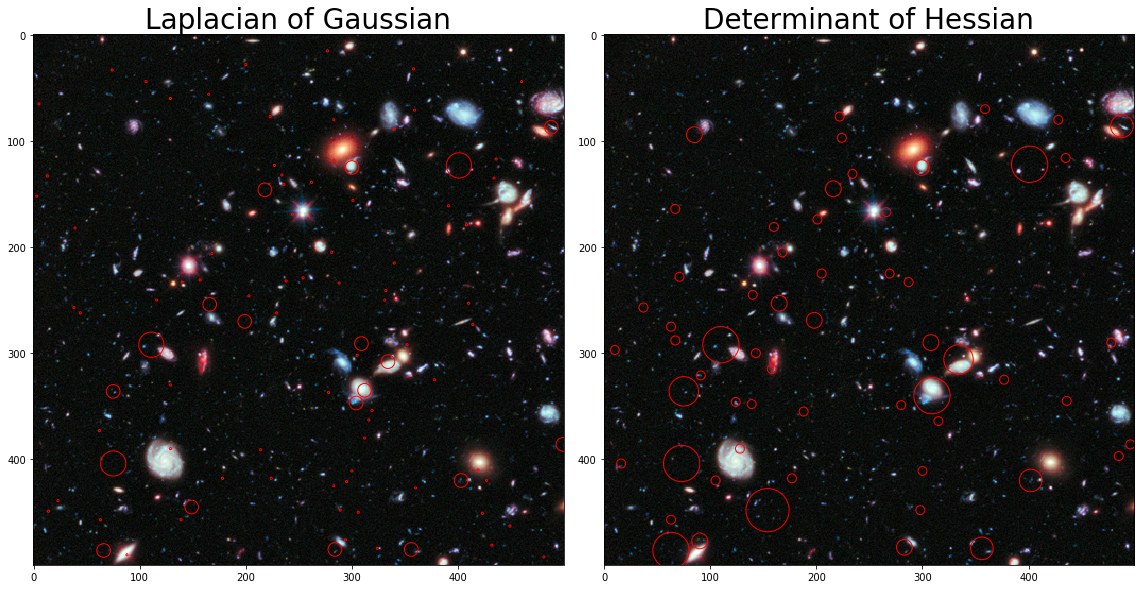

In [79]:
# Plot the 2 methods side-by-side along with circle patches. 
plt.figure(figsize=(16,32))
ax1 = plt.subplot(1,2,1)
plt.title("Laplacian of Gaussian",fontsize=28)
io.imshow(image)
for x,y,r in log_blobs:
    ax1.add_patch(plt.Circle((x,y),r, color="red", fill=False, linewidth=1))

ax2 = plt.subplot(1,2,2)
plt.title("Determinant of Hessian",fontsize=28)
io.imshow(image)
for x,y,r in doh_blobs:
    ax2.add_patch(plt.Circle((x,y),r, color="red", fill=False, linewidth=1))
